<a href="https://colab.research.google.com/github/conormooney98/Applied-Predictive-Analytics/blob/main/C17367221_CA2111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coefficients: 
 [938.23786125]
Mean squared error: 3851.73
Coefficient of determination: 0.37


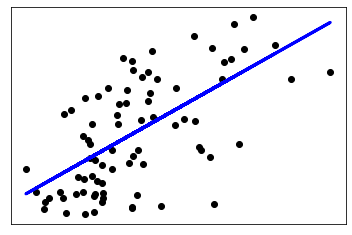

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-80:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-80:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
%matplotlib inline
import pandas as pd
import pandas.testing as tm
import itertools
import time
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.datasets import load_diabetes

x = load_diabetes()
df_x = pd.DataFrame(x.data, columns = x.feature_names)
df_y = df_x
df_x["s7"] = x.target
X = df_x.drop("s7",1)
y = df_x["s7"]
df_x.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
print("Number of null values:", df_x.isnull().sum())

Number of null values: age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
s7     0
dtype: int64


In [ ]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):
  models_fwd.loc[i] = forward(predictors)
  predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 1 predictors in 0.05460548400878906 seconds.
Processed  9 models on 2 predictors in 0.024398088455200195 seconds.
Processed  8 models on 3 predictors in 0.018766403198242188 seconds.
Processed  7 models on 4 predictors in 0.027388811111450195 seconds.
Processed  6 models on 5 predictors in 0.024403095245361328 seconds.
Processed  5 models on 6 predictors in 0.032288551330566406 seconds.
Processed  4 models on 7 predictors in 0.015129327774047852 seconds.
Processed  3 models on 8 predictors in 0.008764266967773438 seconds.
Processed  2 models on 9 predictors in 0.0179593563079834 seconds.
Processed  1 models on 10 predictors in 0.005846977233886719 seconds.
Total elapsed time: 0.2955155372619629 seconds.


In [ ]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                     s7   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              33.27
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                    1.51e-08
Time:                        17:28:01   Log-Likelihood:                         -2882.5
No. Observations:                 442   AIC:                                      5767.
Df Residuals:                     441   BIC:                                      5771.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        print(combo)
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5')
('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's6')
('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6')
('age', 'sex', 'bmi', 'bp', 's1', 's2', 's4', 's5', 's6')
('age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6')
('age', 'sex', 'bmi', 'bp', 's2', 's3', 's4', 's5', 's6')
('age', 'sex', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6')
('age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's5', 's6')
('age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6')
('sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6')
Processed  10 models on 9 predictors in 0.060752153396606445 seconds.
('sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5')
('sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's6')
('sex', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6')
('sex', 'bmi', 'bp', 's1', 's2', 's4', 's5', 's6')
('sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6')
('sex', 'bmi', 'bp', 's2', 's3', 's4', 's5', 's6')
('sex', 'bmi', 's1', 's2', 's3', 's4', 's5', 's

In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------
bmi    529.049295
s5     705.298509
bp     333.834795
s1    -615.080577
sex   -236.722058
s2     353.168035
s4     135.265284
dtype: float64


In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------
sex   -236.722058
bmi    529.049295
bp     333.834795
s1    -615.080577
s2     353.168035
s4     135.265284
s5     705.298509
dtype: float64


In [ ]:
alphas = 10**np.linspace(10,-2,100) *0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

(100, 10)

Text(0, 0.5, 'weights')

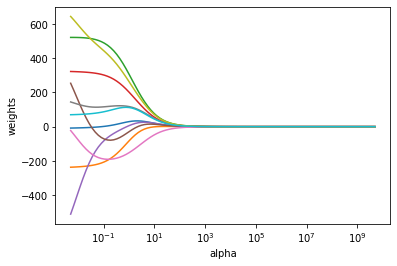

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

age     22.402977
sex     -5.618353
bmi    160.458274
bp     106.547463
s1      39.399975
s2      22.319297
s3     -98.884843
s4      98.731752
s5     137.564570
s6      94.705808
dtype: float64
3896.3526152538343


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridge3 = Ridge(alpha = 10**10, normalize =True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

age    2.848959e-08
sex    1.184922e-08
bmi    1.051643e-07
bp     7.800925e-08
s1     4.365601e-08
s2     3.532087e-08
s3    -7.639064e-08
s4     8.378210e-08
s5     9.728929e-08
s6     7.368457e-08
dtype: float64
5474.142153502528


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred4 = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred4))           # Calculate the test MSE

age     -87.130384
sex    -166.711412
bmi     578.908336
bp      274.505741
s1    -1109.706420
s2      773.082983
s3      340.905224
s4      271.176216
s5      872.943134
s6      120.968689
dtype: float64
3100.1192452983046


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.005

In [ ]:
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


3085.2795594810746

In [ ]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


age     -8.253075
sex   -236.788109
bmi    521.090446
bp     322.114144
s1    -510.610897
s2     253.403536
s3     -22.566496
s4     144.185124
s5     643.516038
s6      69.668202
dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Text(0, 0.5, 'weights')

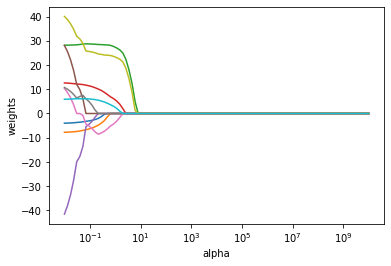

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

3080.423594742251

In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

age    -75.550819
sex   -152.344253
bmi    586.532804
bp     258.666036
s1    -382.531712
s2     216.507283
s3      -0.000000
s4     146.405744
s5     611.786482
s6     127.517338
dtype: float64

In [ ]:
from sklearn.linear_model import ElasticNet

#train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(X_train,y_train)

#calculate the prediction and MSE
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("MSE on test set: ", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

MSE on test set:  5420.305925240563


,Columns,Coefficient Estimate
0,age,0.277375
1,sex,0.000000
2,bmi,3.908415
3,bp,2.371724
4,s1,0.903900
5,s2,0.507499
6,s3,-2.113738
7,s4,2.756480
8,s5,3.916486
9,s6,2.307941


In [ ]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  s7      442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
pca = PCA() # create a PCA model
X_reduced = pca.fit_transform(scale(X)) # train the PCA model of scaled data X-- unsupervised
pd.DataFrame(pca.components_.T) # components tansposed matrix

,0,1,2,3,4,5,6,7,8,9
0,0.216431,0.044372,0.494668,-0.414009,-0.686864,-0.225851,-0.109538,0.014935,0.008101,0.003263
1,0.186967,-0.386548,-0.106858,-0.679861,0.373456,0.041731,-0.067606,0.442940,-0.002106,0.003661
2,0.303162,-0.156281,0.167532,0.499825,0.129359,-0.403142,-0.519858,0.392942,0.042378,0.008248
3,0.271740,-0.138256,0.513568,-0.019667,0.486890,-0.272763,0.320649,-0.477364,0.027194,-0.003221
4,0.343255,0.573027,-0.068587,-0.068395,0.129174,0.005409,0.073649,0.129414,-0.042040,0.709774
5,0.351861,0.455940,-0.269694,-0.167774,0.116731,-0.133257,-0.230540,-0.191311,-0.359315,-0.563196
6,-0.282436,0.506243,0.386028,-0.076020,0.244991,0.106372,-0.007534,0.324636,0.481248,-0.317444
7,0.428833,-0.068184,-0.380681,0.007921,-0.143644,-0.033945,0.071236,-0.180588,0.773817,-0.090595
8,0.378617,-0.026189,0.063632,0.264427,-0.151661,0.178730,0.647313,0.449660,-0.189459,-0.264467
9,0.322183,-0.084947,0.276843,0.087086,0.031388,0.805064,-0.357273,-0.166609,-0.015274,0.002611


In [ ]:
expLianedVariance=(pca.explained_variance_/pca.explained_variance_.sum())*100
expLianedVarianceCum=expLianedVariance.cumsum()
pd.DataFrame( expLianedVarianceCum, expLianedVariance)

,0
40.242142,40.242142
14.923182,55.165324
12.059623,67.224947
9.554764,76.779711
6.621856,83.401567
6.027192,89.428759
5.365605,94.794364
4.336832,99.131196
0.783199,99.914395
0.085605,100.000000


In [ ]:
expLianedVariance.size

10

(0.0, 20.0)

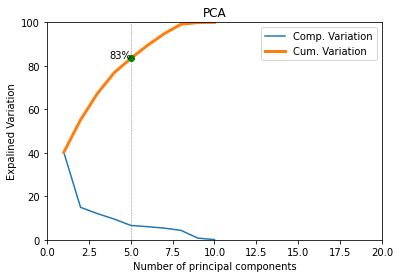

In [ ]:
xlabel=range(1, expLianedVariance.size+1)
xlabel=np.reshape( np.asarray(list(xlabel)), (10,))
N_PC_sel=5
variance_N_PC= expLianedVarianceCum[N_PC_sel-1]
plt.figure( )

plt.plot(list(xlabel),expLianedVariance, label='Comp. Variation')
plt.plot(list(xlabel),expLianedVarianceCum, label = 'Cum. Variation', linewidth=3)
#Vertical line at the selected no of components
plt.axvline(x=N_PC_sel, linestyle='dashed',linewidth=.5, color='grey')
# add apoint
plt.plot(N_PC_sel,variance_N_PC, color='green', marker='o')
plt.text(N_PC_sel,variance_N_PC,"{0:.0%}".format(variance_N_PC/100.0), horizontalalignment='right')

plt.legend()
plt.title('PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Expalined Variation')
plt.ylim([0,100])
plt.xlim([0,20])

In [ ]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.216431,0.044372,0.494668,-0.414009,-0.686864,-0.225851
1,0.186967,-0.386548,-0.106858,-0.679861,0.373456,0.041731
2,0.303162,-0.156281,0.167532,0.499825,0.129359,-0.403142
3,0.271740,-0.138256,0.513568,-0.019667,0.486890,-0.272763
4,0.343255,0.573027,-0.068587,-0.068395,0.129174,0.005409


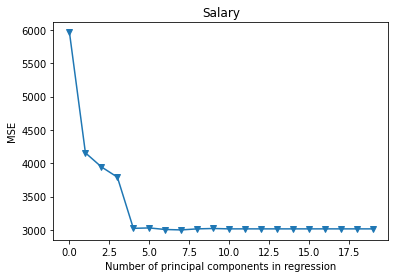

In [ ]:
# 10-fold CV, with shuffle
from sklearn.linear_model import LinearRegression

n = len(X_reduced)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 40.24,  55.16,  67.22,  76.77,  83.39,  89.42,  94.79,  99.13,
        99.91, 100.  ])

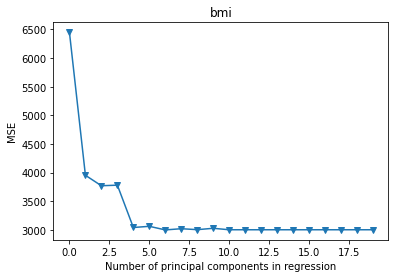

In [ ]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('bmi')
plt.xlim(xmin=-1);

In [ ]:
#Already had these imports, but code wouldn't work without them
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

3104.3520197508205

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(11) should be in [1, n_features].n_components=10 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(11) should be in [1, n_features].n_components=10 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(11) should be in [1, n_features].n_components=10 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(11) should be in [1, n_features].n_component

(-1.0, 19.9)

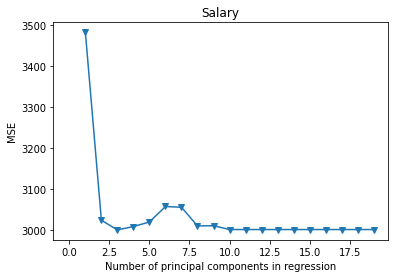

In [ ]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [ ]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

regr = LinearRegression()
regr.fit

<bound method LinearRegression.fit of LinearRegression()>

In [ ]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

3149.0375770499795

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df_x = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [ ]:
print(df_x)

          age       sex       bmi  ...       tch       ltg       glu
0    0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1   -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2    0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3   -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4    0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641
..        ...       ...       ...  ...       ...       ...       ...
437  0.041708  0.050680  0.019662  ... -0.002592  0.031193  0.007207
438 -0.005515  0.050680 -0.015906  ...  0.034309 -0.018118  0.044485
439  0.041708  0.050680 -0.015906  ... -0.011080 -0.046879  0.015491
440 -0.045472 -0.044642  0.039062  ...  0.026560  0.044528 -0.025930
441 -0.045472 -0.044642 -0.073030  ... -0.039493 -0.004220  0.003064

[442 rows x 10 columns]


In [ ]:
#Create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
print(predictions[0:5])
print(y_test[0:5])

[194.94109332  90.2363758   72.87918117 139.7624533  135.16007933]
[173.  69.  39. 172. 219.]


Text(0, 0.5, 'Predictions')

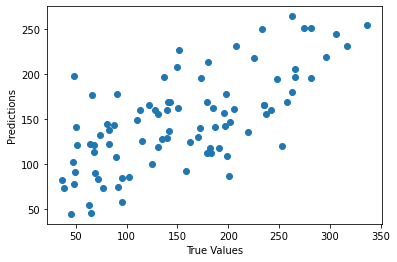

In [ ]:
# The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
print ("Score:", model.score(X_test, y_test))

Score: 0.4588290935407504


In [ ]:
import numpy as np
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [ ]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [ ]:
# evaluate a Linear regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
X = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = linear_model.LinearRegression()
# evaluate model
scores = cross_val_score(model, X, y , cv=cv, n_jobs=-1)
# report performance
print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 0.470 (0.090)


In [ ]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`

In [ ]:
# evaluate a linear regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
 #Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
X = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = linear_model.LinearRegression()
# evaluate model
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
# report performance
print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 0.472 (0.124)


-1 mean=0.4703 se=0.030
-2 mean=0.4700 se=0.025
-3 mean=0.4717 se=0.023
-4 mean=0.4733 se=0.018
-5 mean=0.4766 se=0.016
-6 mean=0.4750 se=0.015
-7 mean=0.4732 se=0.014
-8 mean=0.4735 se=0.012
-9 mean=0.4709 se=0.012
-10 mean=0.4701 se=0.011
-11 mean=0.4699 se=0.011
-12 mean=0.4688 se=0.011
-13 mean=0.4692 se=0.010
-14 mean=0.4694 se=0.010
-15 mean=0.4694 se=0.010
-16 mean=0.4706 se=0.009
-17 mean=0.4713 se=0.009
-18 mean=0.4725 se=0.009
-19 mean=0.4729 se=0.008
-20 mean=0.4721 se=0.008
-21 mean=0.4725 se=0.008
-22 mean=0.4716 se=0.008
-23 mean=0.4720 se=0.008
-24 mean=0.4723 se=0.007
-25 mean=0.4731 se=0.007
-26 mean=0.4724 se=0.007
-27 mean=0.4727 se=0.007
-28 mean=0.4727 se=0.007
-29 mean=0.4722 se=0.007


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


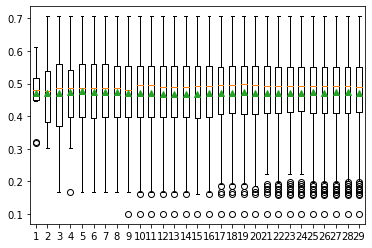

In [ ]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = linear_model.LinearRegression()
	# evaluate model
	scores = cross_val_score(model, X, y,  cv=cv, n_jobs=-1)
	return scores

#Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
X = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
# configurations to test
repeats = range(1,30)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('-%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

LR: 0.188118 (0.176208)
Ridge: 0.148143 (0.099151)
Lasso: -0.065665 (0.061768)
Elastic: -0.065665 (0.061768)


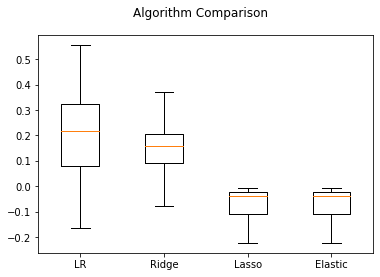

In [ ]:
# Compare Algorithms
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold

#array = df_x.values
df_x = array[:,0:8]
df_y = array[:,8]
# prepare configuration for cross validation test harness
seed = 6
# prepare models
models = []
models.append(('LR', LinearRegression()))
#models.append(('BR', BackwardSelection()))
#models.append(('FR', ForwardSelection()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('Elastic', ElasticNet()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
	kFold = model_selection.KFold(n_splits=20, shuffle=True, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kFold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()